In [15]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
from xgboost import XGBRegressor
import matplotlib.pyplot as plt

In [16]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:
file_url = '/content/drive/MyDrive/data_mining_project/data_encoded.csv'
data = pd.read_csv(file_url)


In [18]:
data = data.drop(columns=['Unnamed: 0'])

In [19]:
data

,Mileage,Price,Fuel Type,Car Age,Brand_alfa romeo,Brand_audi,Brand_bmw,Brand_chevrolet,Brand_citroen,Brand_dacia,...,Model_xceed,Model_xsara picasso,Model_yaris,Model_yaris cross,Model_yeti,Model_z4,Model_zafira,Model_zafira tourer,Model_zoe,Model_zr-v
0,182707.0,4950,5,16.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,273250.0,8400,1,11.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,137528.0,7900,5,16.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4043.0,39900,5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,175144.0,9999,1,15.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6377,14910.0,20495,4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6378,3877.0,17899,5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6379,1300.0,21600,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6380,30220.0,23910,4,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
mileage_scaler = MinMaxScaler()
data['Mileage'] = mileage_scaler.fit_transform(data[['Mileage']])

In [21]:
price_scaler = MinMaxScaler()
data['Price'] = price_scaler.fit_transform(data[['Price']])

In [22]:
year_scaler = MinMaxScaler()
data['Car Age'] = year_scaler.fit_transform(data[['Car Age']])

In [23]:
fuel_scaler = MinMaxScaler()
data['Fuel Type'] = year_scaler.fit_transform(data[['Fuel Type']])

In [24]:
X, Y = data.drop(columns=['Price']), data['Price']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [25]:
def print_scores(model_name, Y_test, Y_pred):
  print(f"****** METRICS OF {model_name} ******")
  print(f"Mean absolute error: {mean_absolute_error(Y_test, Y_pred)}")
  print(f"Mean squared error: {mean_squared_error(Y_test, Y_pred)}")
  print(f"R2 score: {r2_score(Y_test, Y_pred)}")
  print("******************************************")

### LinearRegression

In [26]:
reg_model = LinearRegression()
reg_model.fit(X_train, Y_train)
lin_preds = price_scaler.inverse_transform(reg_model.predict(X_test).reshape(-1,1))

In [30]:
print_scores("Linear Regression", Y_test, lin_preds)

****** METRICS OF Linear Regression ******
Mean absolute error: 1.4698430264408386e+16
Mean squared error: 1.062615645443032e+34
R2 score: -3.75859815941318e+36
******************************************


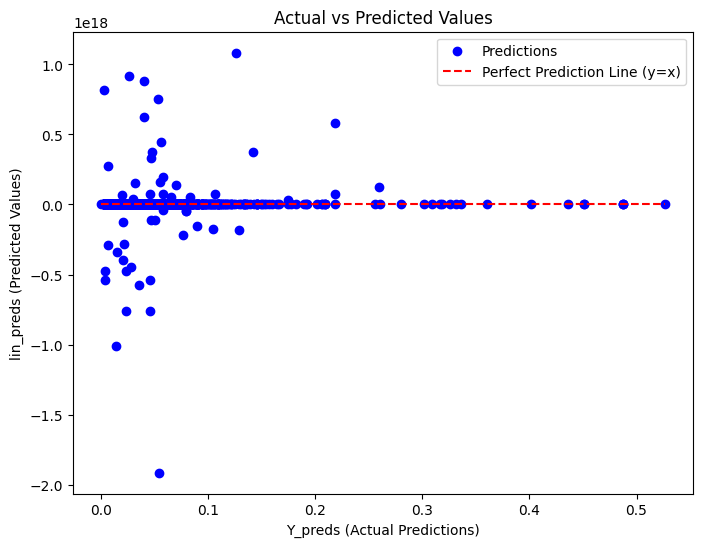

In [34]:
plt.figure(figsize=(8, 6))
plt.scatter(Y_test, lin_preds, color='blue', label='Predictions')
x = np.linspace(min(Y_test), max(Y_test), 100)
plt.plot(x, x, color='red', linestyle='--', label='Perfect Prediction Line (y=x)')
plt.xlabel('Y_preds (Actual Predictions)')
plt.ylabel('lin_preds (Predicted Values)')
plt.title('Actual vs Predicted Values')
plt.legend()

### Lasso Regression(L1 regularization)


In [28]:
lasso = Lasso(alpha=0.01)
lasso.fit(X_train, Y_train)
lasso_preds = lasso.predict(X_test)

In [31]:
print_scores("Lasso Regression", Y_test, lasso_preds)

****** METRICS OF Lasso Regression ******
Mean absolute error: 0.029689642906134954
Mean squared error: 0.0028272125417371026
R2 score: -1.8765130503251015e-05
******************************************


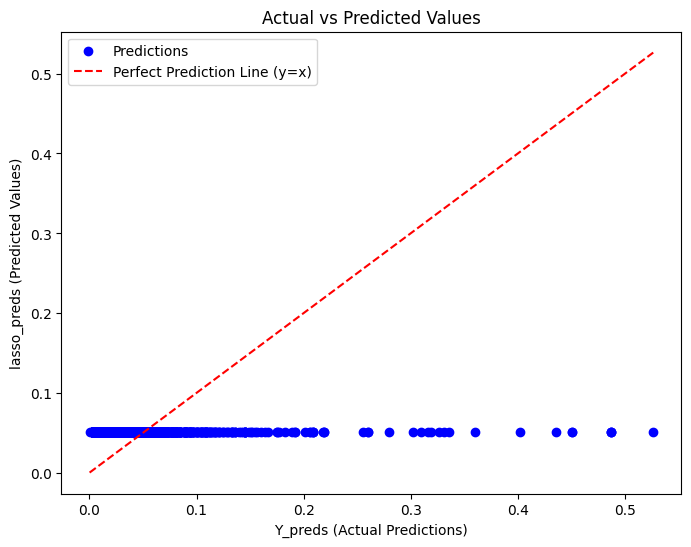

In [43]:
plt.figure(figsize=(8, 6))
plt.scatter(Y_test, lasso_preds, color='blue', label='Predictions')
x = np.linspace(min(Y_test), max(Y_test), 100)
plt.plot(x, x, color='red', linestyle='--', label='Perfect Prediction Line (y=x)')
plt.xlabel('Y_preds (Actual Predictions)')
plt.ylabel('lasso_preds (Predicted Values)')
plt.title('Actual vs Predicted Values')
plt.legend()

### Ridge regression(L2 regularization)

In [35]:
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, Y_train)
Ridge_preds = ridge.predict(X_test)

In [36]:
Ridge_preds

array([0.01602931, 0.04208558, 0.0296563 , ..., 0.00432   , 0.02786651,
       0.0334096 ])

In [37]:
print_scores("Ridge Regression", Y_test, Ridge_preds)

****** METRICS OF Ridge Regression ******
Mean absolute error: 0.01152295350368598
Mean squared error: 0.0004984033404032035
R2 score: 0.8237087995157614
******************************************


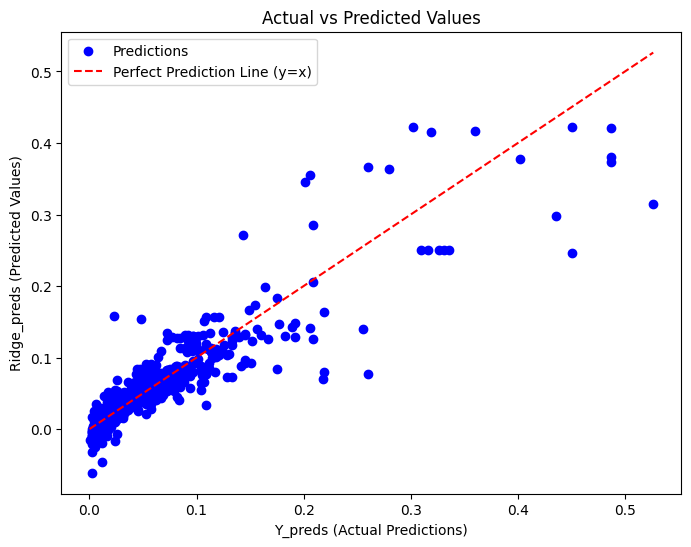

In [42]:
plt.figure(figsize=(8, 6))
plt.scatter(Y_test, Ridge_preds, color='blue', label='Predictions')
x = np.linspace(min(Y_test), max(Y_test), 100)
plt.plot(x, x, color='red', linestyle='--', label='Perfect Prediction Line (y=x)')
plt.xlabel('Y_preds (Actual Predictions)')
plt.ylabel('Ridge_preds (Predicted Values)')
plt.title('Actual vs Predicted Values')
plt.legend()

### Grid Search CV

In [38]:
ridge = Ridge()

param_grid = {
    'alpha': np.logspace(-3, 3, 100),
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag']
}

grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error')

grid_search.fit(X_train, Y_train)

KeyboardInterrupt: 

In [ ]:
gs_preds = grid_search.predict(X_test)

In [ ]:
print_scores("Grid Search",Y_test, gs_preds)

## XGBoost

In [39]:
xgb_model = XGBRegressor(n_estimators=500, learning_rate=0.001, random_state=42, max_depth=10)
xgb_model.fit(X_train, Y_train)
xgb_preds = xgb_model.predict(X_test)

In [40]:
print_scores("XGBoost", Y_test, xgb_preds)

****** METRICS OF XGBoost ******
Mean absolute error: 0.021082000796275473
Mean squared error: 0.0012628995118341864
R2 score: 0.5532973939297927
******************************************


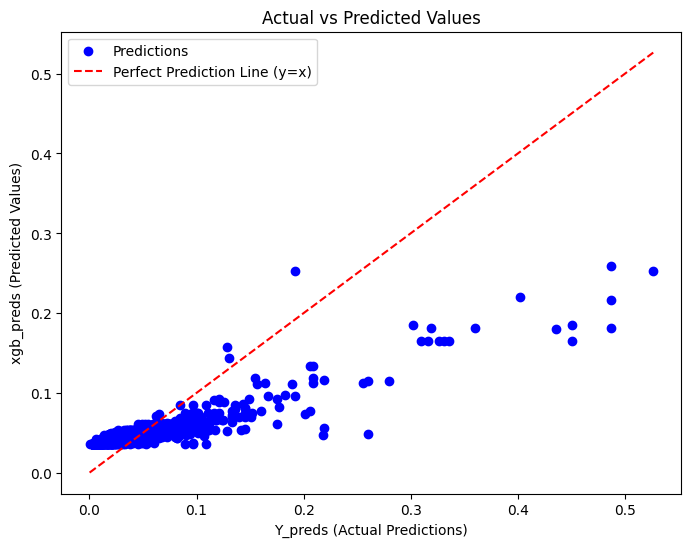

In [44]:
plt.figure(figsize=(8, 6))
plt.scatter(Y_test, xgb_preds, color='blue', label='Predictions')
x = np.linspace(min(Y_test), max(Y_test), 100)
plt.plot(x, x, color='red', linestyle='--', label='Perfect Prediction Line (y=x)')
plt.xlabel('Y_preds (Actual Predictions)')
plt.ylabel('xgb_preds (Predicted Values)')
plt.title('Actual vs Predicted Values')
plt.legend()

## Visualization of results

In [45]:
"""
plt.figure(figsize=(20, 10))
#-- real values
plt.plot(Y_test, label='True Values', marker='o', color='blue', linewidth=2)
#-- predictions from every model
plt.plot(lin_preds, label='Linear Regression', marker='o', linestyle='--', color='green', linewidth=1.5)
plt.plot(lasso_preds, label='Lasso Regression', marker='o', linestyle='--', color='orange', linewidth=1.5)
plt.plot(Ridge_preds, label='Ridge Regression', marker='o', linestyle='--', color='red', linewidth=1.5)
plt.plot(gs_preds, label='GridSearchCV', marker='o', linestyle='--', color='purple', linewidth=1.5)
plt.plot(xgb_preds, label='XGBoost', marker='o', linestyle='--', color='brown', linewidth=1.5)

plt.title('Comparison of True Values and Model Predictions', fontsize=16)
plt.xlabel('Sample Index', fontsize=12)
plt.ylabel('Target Value', fontsize=12)
"""

"\nplt.figure(figsize=(20, 10))\n#-- real values\nplt.plot(Y_test, label='True Values', marker='o', color='blue', linewidth=2)\n#-- predictions from every model\nplt.plot(lin_preds, label='Linear Regression', marker='o', linestyle='--', color='green', linewidth=1.5)\nplt.plot(lasso_preds, label='Lasso Regression', marker='o', linestyle='--', color='orange', linewidth=1.5)\nplt.plot(Ridge_preds, label='Ridge Regression', marker='o', linestyle='--', color='red', linewidth=1.5)\nplt.plot(gs_preds, label='GridSearchCV', marker='o', linestyle='--', color='purple', linewidth=1.5)\nplt.plot(xgb_preds, label='XGBoost', marker='o', linestyle='--', color='brown', linewidth=1.5)\n\nplt.title('Comparison of True Values and Model Predictions', fontsize=16)\nplt.xlabel('Sample Index', fontsize=12)\nplt.ylabel('Target Value', fontsize=12)\n"

In [46]:
"""
plt.figure(figsize=(50, 25))
#Y_test = price_scaler.inverse_transform(Y_test.values.reshape(-1,1))

#-- predictions from every model
plt.plot(price_scaler.inverse_transform(lin_preds), label='Linear Regression', marker='.', linestyle='--', color='green', linewidth=0.5)
plt.plot(price_scaler.inverse_transform(price_scaler.inverse_transform(lasso_preds.reshape(-1,1))), label='Lasso Regression', marker='o', linestyle='--', color='orange', linewidth=0.5)
plt.plot(Y_test, label='True Values', marker='.', color='blue', linewidth=2)
plt.show()
"""

"\nplt.figure(figsize=(50, 25))\n#Y_test = price_scaler.inverse_transform(Y_test.values.reshape(-1,1))\n\n#-- predictions from every model\nplt.plot(price_scaler.inverse_transform(lin_preds), label='Linear Regression', marker='.', linestyle='--', color='green', linewidth=0.5)\nplt.plot(price_scaler.inverse_transform(price_scaler.inverse_transform(lasso_preds.reshape(-1,1))), label='Lasso Regression', marker='o', linestyle='--', color='orange', linewidth=0.5)\nplt.plot(Y_test, label='True Values', marker='.', color='blue', linewidth=2)\nplt.show()\n"